In [3]:
import urllib2
import csv
import numpy as np
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [270]:
url = 'http://www.census.gov/popest/data/counties/totals/2002/files/2002_co_detail_dataset.csv'
response = urllib2.urlopen(url)
countyPopRaw = pd.read_csv(response, converters={'cty': lambda x: str(x), 'st': lambda x: str(x)})
countyPopRaw['FIPS'] = (countyPopRaw.st + countyPopRaw.cty).str.lstrip("0").astype(float)

In [271]:
countyPopRaw.head()

,cty,st,reg,div,name,stname,census2000pop,estimatesbase2000,popestimate2000,popestimate2001,...,internationalmig2000,internationalmig2001,internationalmig2002,internalmig2000,internalmig2001,internalmig2002,residual2000,residual2001,residual2002,FIPS
0,001,01,3,6,Autauga County,Alabama,43671,43671,43903,44698,...,7,14,11,153,521,645,4,4,6,1001
1,003,01,3,6,Baldwin County,Alabama,140415,140415,141410,144787,...,48,186,185,847,2773,2700,14,20,68,1003
2,005,01,3,6,Barbour County,Alabama,29038,29038,29047,28993,...,14,56,56,-24,-207,-286,1,-9,0,1005
3,007,01,3,6,Bibb County,Alabama,20826,20826,20869,21935,...,2,8,8,208,796,-107,-172,211,-3,1007
4,009,01,3,6,Blount County,Alabama,51024,51024,51213,52143,...,30,121,120,87,585,433,-3,3,13,1009


In [302]:
countyPop = countyPopRaw[['FIPS','popestimate2002','name']]

In [303]:
countyPop.head()

,FIPS,popestimate2002,name
0,1001,45604,Autauga County
1,1003,147932,Baldwin County
2,1005,28826,Barbour County
3,1007,21838,Bibb County
4,1009,52968,Blount County


In [305]:
countyPop.columns=['FIPS','Pop 2002','County Name']

In [306]:
countyPop.head()

,FIPS,Pop 2002,County Name
0,1001,45604,Autauga County
1,1003,147932,Baldwin County
2,1005,28826,Barbour County
3,1007,21838,Bibb County
4,1009,52968,Blount County


In [307]:
vulcanDF = pd.read_csv('CO2_and_PopData.csv')

In [308]:
vulcanDF.columns=['State','County','FIPS','Total CO2 (Mte)']
vulcanDF.head()

,State,County,FIPS,Total CO2 (Mte)
0,AL,Autauga,1001,0.256167
1,AL,Baldwin,1003,0.450031
2,AL,Barbour,1005,0.099370
3,AL,Bibb,1007,0.045945
4,AL,Blount,1009,0.114776


In [309]:
result = pd.merge(vulcanDF,countyPop, how = 'inner', on= 'FIPS')

In [338]:
result

,State,County,FIPS,Total CO2 (Mte),Pop 2002,County Name
0,AL,Autauga,1001,0.256167,45604,Autauga County
1,AL,Baldwin,1003,0.450031,147932,Baldwin County
2,AL,Barbour,1005,0.099370,28826,Barbour County
3,AL,Bibb,1007,0.045945,21838,Bibb County
4,AL,Blount,1009,0.114776,52968,Blount County
5,AL,Bullock,1011,0.031340,11367,Bullock County
6,AL,Butler,1013,0.098010,20911,Butler County
7,AL,Calhoun,1015,0.466963,111616,Calhoun County
8,AL,Chambers,1017,0.084447,36251,Chambers County
9,AL,Cherokee,1019,0.062066,24315,Cherokee County


In [330]:
densityDF = pd.read_csv('Density.csv')
densityDF.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographical Area,Geographical Area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,0100000US,NaN,United States,0100000US,NaN,United States,United States,281421906,115904641,3794083.06,256644.62,3537438.44,79.6,32.8
1,0100000US,NaN,United States,0400000US01,1,United States - Alabama,Alabama,4447100,1963711,52419.02,1675.01,50744.00,87.6,38.7
2,0100000US,NaN,United States,0500000US01001,1001,United States - Alabama - Autauga County,Autauga County,43671,17662,604.45,8.48,595.97,73.3,29.6
3,0100000US,NaN,United States,0500000US01003,1003,United States - Alabama - Baldwin County,Baldwin County,140415,74285,2026.93,430.58,1596.35,88.0,46.5
4,0100000US,NaN,United States,0500000US01005,1005,United States - Alabama - Barbour County,Barbour County,29038,12461,904.52,19.61,884.90,32.8,14.1


In [331]:
densityDF = densityDF[['Target Geo Id2','Geographical Area.1','Population','Area in square miles - Total area','Density per square mile of land area - Population']]

In [332]:
densityDF.columns=['FIPS','County Name','Population 2000', 'Total Area (sq mile)','Population per Square Mile']

In [333]:
densityDF.head()

,FIPS,County Name,Population 2000,Total Area (sq mile),Population per Square Mile
0,NaN,United States,281421906,3794083.06,79.6
1,1,Alabama,4447100,52419.02,87.6
2,1001,Autauga County,43671,604.45,73.3
3,1003,Baldwin County,140415,2026.93,88.0
4,1005,Barbour County,29038,904.52,32.8


In [334]:
result2 = pd.merge(result,densityDF, how = 'inner', on= ['FIPS'])

In [337]:
result2

,State,County,FIPS,Total CO2 (Mte),Pop 2002,County Name_x,County Name_y,Population 2000,Total Area (sq mile),Population per Square Mile
0,AL,Autauga,1001,0.256167,45604,Autauga County,Autauga County,43671,604.45,73.3
1,AL,Baldwin,1003,0.450031,147932,Baldwin County,Baldwin County,140415,2026.93,88.0
2,AL,Barbour,1005,0.099370,28826,Barbour County,Barbour County,29038,904.52,32.8
3,AL,Bibb,1007,0.045945,21838,Bibb County,Bibb County,20826,626.16,33.4
4,AL,Blount,1009,0.114776,52968,Blount County,Blount County,51024,650.60,79.0
5,AL,Bullock,1011,0.031340,11367,Bullock County,Bullock County,11714,626.06,18.7
6,AL,Butler,1013,0.098010,20911,Butler County,Butler County,21399,777.92,27.5
7,AL,Calhoun,1015,0.466963,111616,Calhoun County,Calhoun County,112249,612.32,184.5
8,AL,Chambers,1017,0.084447,36251,Chambers County,Chambers County,36583,603.11,61.3
9,AL,Cherokee,1019,0.062066,24315,Cherokee County,Cherokee County,23988,599.95,43.4


In [339]:
cbsaTitles = pd.read_csv('CBSA Title.csv')

In [340]:
cbsaTitles = cbsaTitles[['FIPS','CBSA Title']]

In [341]:
resultDF = pd.merge(result2, cbsaTitles, how = 'inner', on = 'FIPS')

In [342]:
resultDF.head()

,State,County,FIPS,Total CO2 (Mte),Pop 2002,County Name_x,County Name_y,Population 2000,Total Area (sq mile),Population per Square Mile,CBSA Title
0,AL,Autauga,1001,0.256167,45604,Autauga County,Autauga County,43671,604.45,73.3,"Montgomery, AL"
1,AL,Baldwin,1003,0.450031,147932,Baldwin County,Baldwin County,140415,2026.93,88.0,"Daphne-Fairhope, AL"
2,AL,Bibb,1007,0.045945,21838,Bibb County,Bibb County,20826,626.16,33.4,"Birmingham-Hoover, AL"
3,AL,Blount,1009,0.114776,52968,Blount County,Blount County,51024,650.60,79.0,"Birmingham-Hoover, AL"
4,AL,Calhoun,1015,0.466963,111616,Calhoun County,Calhoun County,112249,612.32,184.5,"Anniston-Oxford, AL"


In [360]:
allCBSA = resultDF[['Pop 2002','Total Area (sq mile)','Total CO2 (Mte)']].groupby(resultDF['CBSA Title']).sum()
allCBSA.head()

,Pop 2002,Total Area (sq mile),Total CO2 (Mte)
CBSA Title,,,
"Abbeville, LA",54114,1538.31,0.257508
"Aberdeen, SD",39250,2882.37,0.181053
"Aberdeen, WA",68470,2224.44,0.156489
"Abilene, TX",158693,2757.64,0.649930
"Ada, OK",34869,725.45,0.711907


In [369]:
largeCBSA = allCBSA[allCBSA['Pop 2002'] > 100000]

In [372]:
largeCBSA['Population Density'] = largeCBSA['Pop 2002']/largeCBSA['Total Area (sq mile)']
largeCBSA['Carbon Emissions per Capita'] = largeCBSA['Total CO2 (Mte)']/largeCBSA['Pop 2002']
largeCBSA.columns
largeCBSA.columns = ['Population (2002)', 'Total Area (sq. miles)', 'Total CO2 (Mte)', 'Population Density per Sq Mile', 'Carbon Emissions per Capita (Mte)']

/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/michelleho/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [390]:
import plotly.plotly as py
from plotly.graph_objs import *

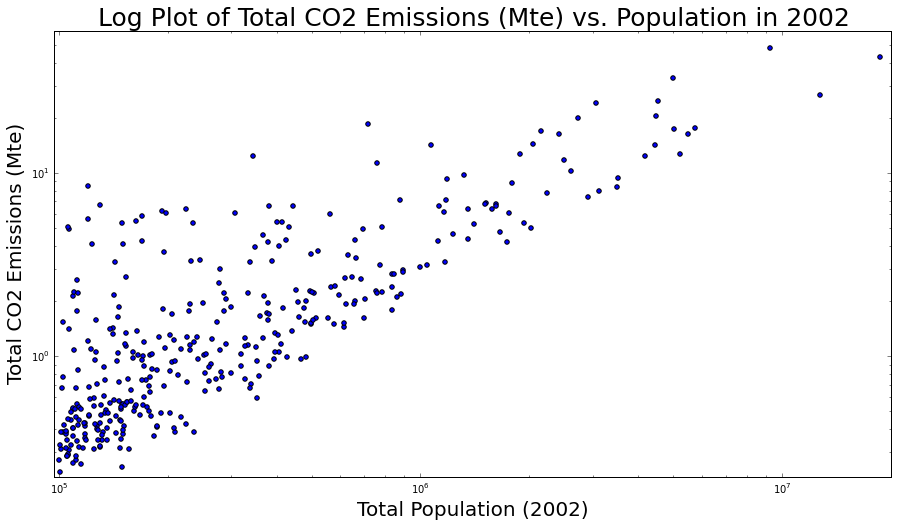

In [432]:
ax = largeCBSA.plot('Population (2002)','Total CO2 (Mte)', figsize=(15,8), kind='scatter', xlim=(0,20000000), ylim=[0,60], loglog=True)
pl.xlabel('Total Population (2002)', fontsize=20)
pl.ylabel('Total CO2 Emissions (Mte)', fontsize=20)
ax.set_title('Log Plot of Total CO2 Emissions (Mte) vs. Population in 2002', fontsize=25)

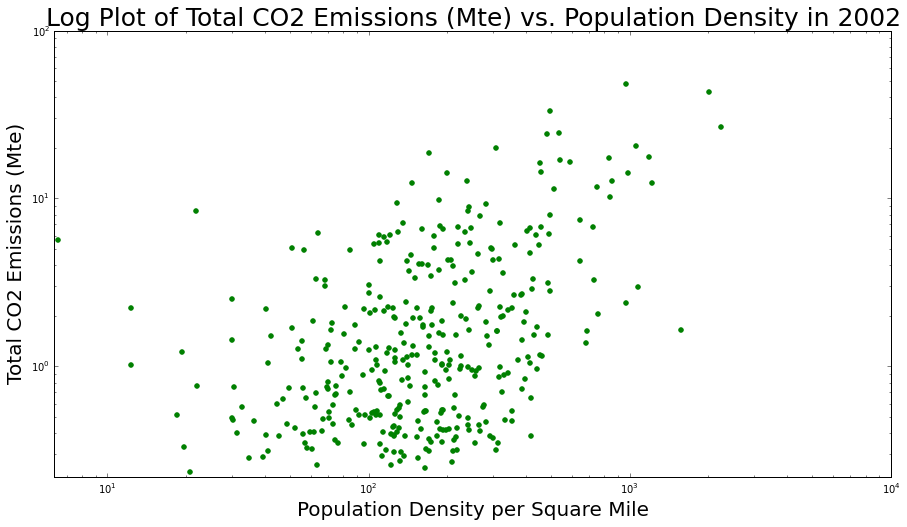

In [440]:
ax = largeCBSA.plot('Population Density per Sq Mile','Total CO2 (Mte)', figsize=(15,8), kind='scatter', ylim=0, xlim=0, color = 'green', loglog = True)
pl.xlabel('Population Density per Square Mile', fontsize=20)
pl.ylabel('Total CO2 Emissions (Mte)', fontsize=20)
ax.set_title('Log Plot of Total CO2 Emissions (Mte) vs. Population Density in 2002', fontsize=25)

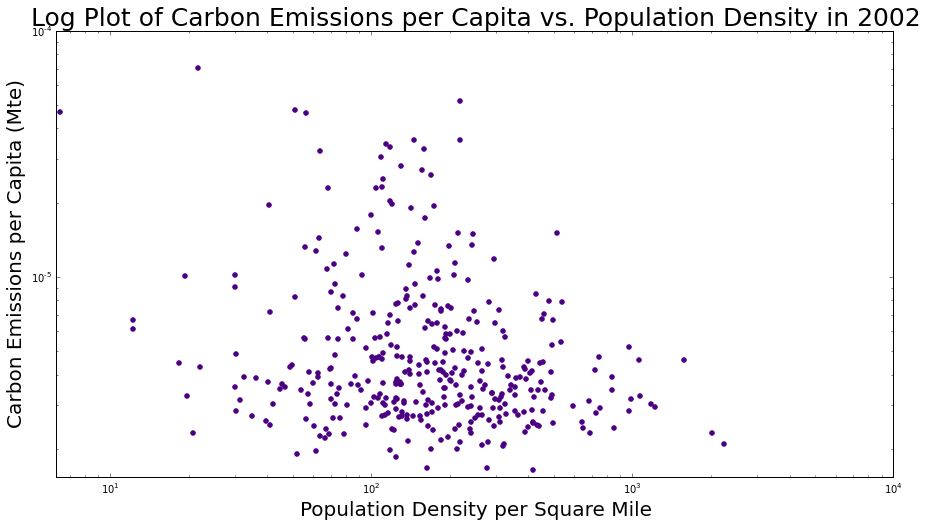

In [443]:
ax = largeCBSA.plot('Population Density per Sq Mile','Carbon Emissions per Capita (Mte)', figsize=(15,8), kind='scatter', ylim=0, xlim=0, color = 'indigo', loglog = True)
pl.xlabel('Population Density per Square Mile', fontsize=20)
pl.ylabel('Carbon Emissions per Capita (Mte)', fontsize=20)
ax.set_title('Log Plot of Carbon Emissions per Capita vs. Population Density in 2002', fontsize=25)

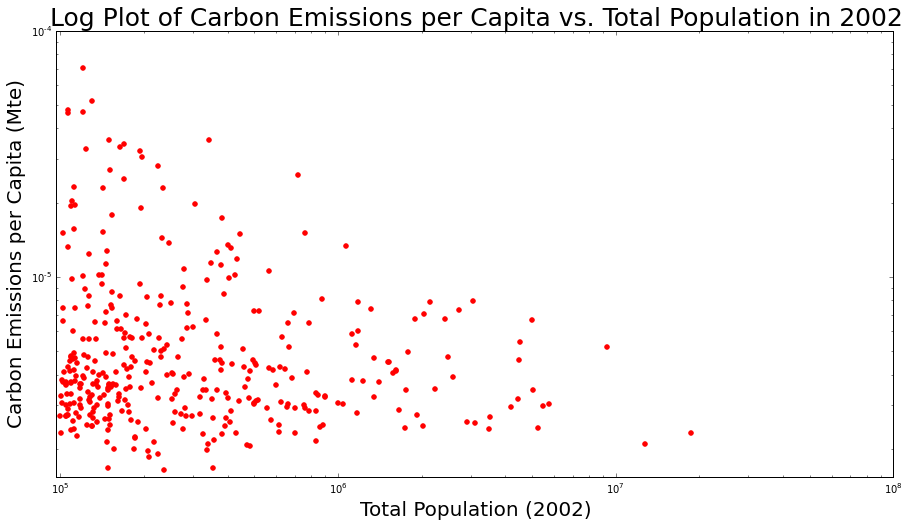

In [446]:
ax = largeCBSA.plot('Population (2002)','Carbon Emissions per Capita (Mte)', figsize=(15,8), kind='scatter', ylim=0, xlim=0, color = 'red', loglog = True)
pl.xlabel('Total Population (2002)', fontsize=20)
pl.ylabel('Carbon Emissions per Capita (Mte)', fontsize=20)
ax.set_title('Log Plot of Carbon Emissions per Capita vs. Total Population in 2002', fontsize=25)

In [458]:
sortByPerCapitaEmissions = largeCBSA.sort('Carbon Emissions per Capita (Mte)')
sortByPerCapitaEmissions.head()

,Population (2002),Total Area (sq. miles),Total CO2 (Mte),Population Density per Sq Mile,Carbon Emissions per Capita (Mte)
CBSA Title,,,,,
"Bremerton-Silverdale, WA",236174,565.98,0.385786,417.283296,0.000002
"Brownsville-Harlingen, TX",353561,1276.33,0.589178,277.013782,0.000002
"Jacksonville, NC",149003,908.56,0.248845,163.999075,0.000002
"Chico, CA",209203,1677.11,0.387643,124.740178,0.000002
"Yakima, WA",224823,4311.61,0.427474,52.143631,0.000002


In [459]:
largeCBSA.to_csv('Large CBSA CO2 and Population.csv')